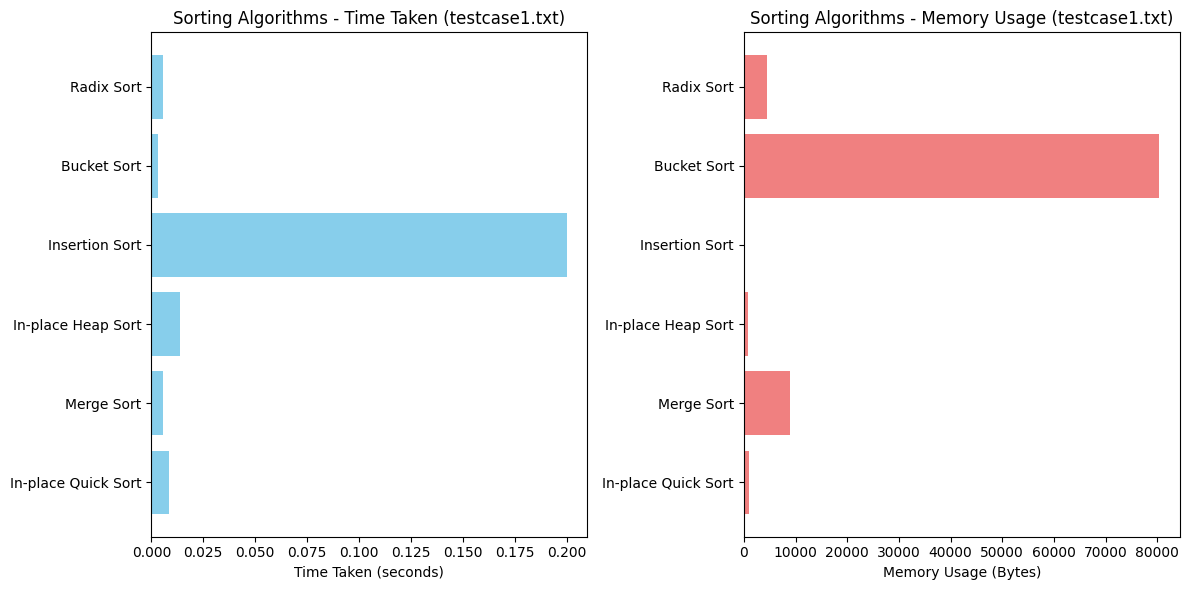

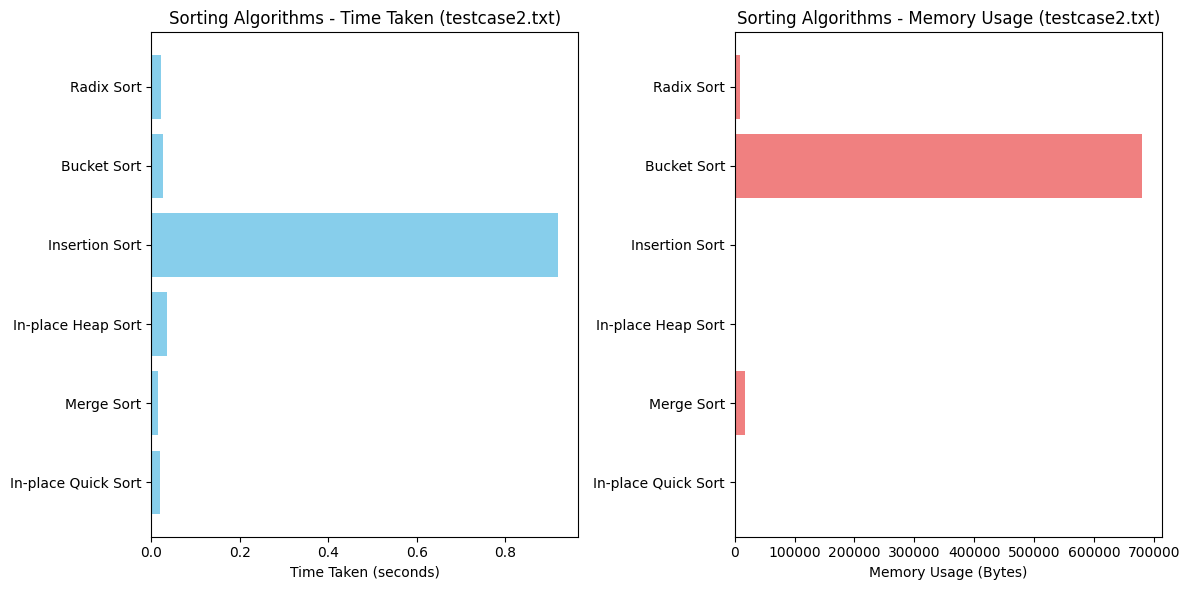

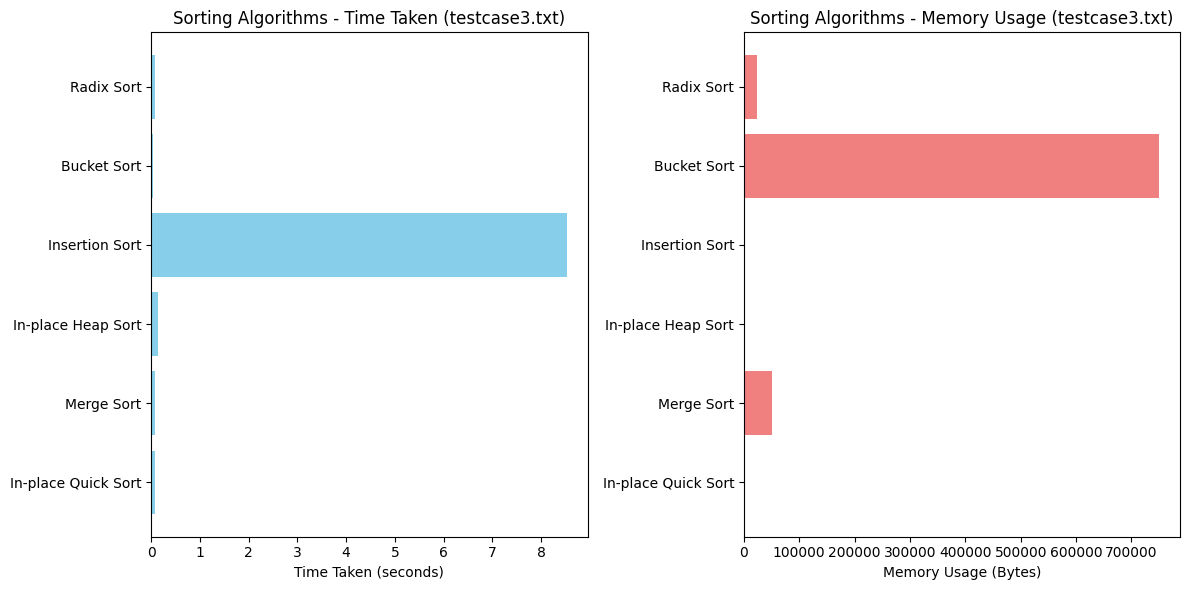

In [6]:
import time
import tracemalloc
import matplotlib.pyplot as plt

# Initialize global counters for comparisons, swaps, and basic operations
comparisons = 0
swaps = 0
basic_operations = 0

def reset_counters():
    global comparisons, swaps, basic_operations
    comparisons = 0
    swaps = 0
    basic_operations = 0

# Sorting algorithm functions (quick_sort, merge_sort, heap_sort, insertion_sort, bucket_sort, radix_sort)

def quick_sorth(arr, low, high):
    global comparisons, swaps, basic_operations
    if low < high:
        # Find the partition index
        pivot_index = partition(arr, low, high)

        # Recursively sort the subarrays
        quick_sorth(arr, low, pivot_index)
        quick_sorth(arr, pivot_index + 1, high)

def quick_sort(arr):
    quick_sorth(arr,0,len(arr)-1)

def partition(arr, low, high):
    global comparisons, swaps, basic_operations
    # Choose the pivot element (in this case, the middle element)
    pivot = arr[(low + high) // 2]

    while True:
        # Find elements greater than pivot from the left
        while arr[low] < pivot:
            low += 1
            comparisons += 1

        # Find elements less than pivot from the right
        while arr[high] > pivot:
            high -= 1
            comparisons += 1

        # If there are no elements to swap, we're done
        if low >= high:
            return high

        # Swap arr[low] and arr[high]
        arr[low], arr[high] = arr[high], arr[low]
        low += 1
        high -= 1
        swaps += 1
        basic_operations += 1

def merge_sort(arr):
    global comparisons, swaps, basic_operations
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left, right):
    global comparisons, swaps, basic_operations
    result = []
    left_idx, right_idx = 0, 0

    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
            comparisons += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
            comparisons += 1

    result.extend(left[left_idx:])
    result.extend(right[right_idx:])
    return result

def heapify(arr, n, i):
    global comparisons, swaps, basic_operations
    largest = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2

    if left_child < n and arr[left_child] > arr[largest]:
        largest = left_child
        comparisons += 1

    if right_child < n and arr[right_child] > arr[largest]:
        largest = right_child
        comparisons += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        swaps += 1
        basic_operations += 1
        heapify(arr, n, largest)

def heap_sort(arr):
    global comparisons, swaps, basic_operations
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        swaps += 1
        basic_operations += 1
        heapify(arr, i, 0)

def insertion_sort(arr):
    global comparisons, swaps, basic_operations
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            swaps += 1
            comparisons += 1
            basic_operations += 2

        arr[j + 1] = key
        basic_operations += 1

def bucket_sort(arr):
    global comparisons, swaps, basic_operations
    max_val = max(arr)
    min_val = min(arr)
    bucket_range = max_val - min_val + 1
    bucket = [[] for _ in range(bucket_range)]

    for num in arr:
        index = num - min_val
        bucket[index].append(num)

    sorted_arr = []
    for b in bucket:
        insertion_sort(b)
        sorted_arr.extend(b)

    return sorted_arr

def counting_sort(arr, exp):
    global comparisons, swaps, basic_operations
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1
        comparisons += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    global comparisons, swaps, basic_operations
    max_val = max(arr)
    exp = 1

    while max_val // exp > 0:
        counting_sort(arr, exp)
        exp *= 10



# Function to measure time and memory usage for a sorting algorithm
def measure_sorting_algorithm(sort_func, arr):
    reset_counters()
    tracemalloc.start()
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    memory_usage = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    sorting_time = end_time - start_time
    return sorting_time, memory_usage

# Process all test cases
test_case_files = ["testcase1.txt", "testcase2.txt", "testcase3.txt"]
sorting_results = {}

for test_case_file in test_case_files:
    numbers_list = []
    with open(test_case_file, "r") as file:
        for line in file:
            number = int(line.strip())
            numbers_list.append(number)

    sorting_results[test_case_file] = {}

    # Measure and store results for each sorting algorithm
    sorting_results[test_case_file]["In-place Quick Sort"] = measure_sorting_algorithm(quick_sort, numbers_list.copy())
    sorting_results[test_case_file]["Merge Sort"] = measure_sorting_algorithm(merge_sort, numbers_list.copy())
    sorting_results[test_case_file]["In-place Heap Sort"] = measure_sorting_algorithm(heap_sort, numbers_list.copy())
    sorting_results[test_case_file]["Insertion Sort"] = measure_sorting_algorithm(insertion_sort, numbers_list.copy())
    sorting_results[test_case_file]["Bucket Sort"] = measure_sorting_algorithm(bucket_sort, numbers_list.copy())
    sorting_results[test_case_file]["Radix Sort"] = measure_sorting_algorithm(radix_sort, numbers_list.copy())

# Plot the graph
for test_case_file, results in sorting_results.items():
    sorting_algorithms = list(results.keys())
    time_taken = [result[0] for result in results.values()]
    memory_usage = [result[1] for result in results.values()]

    # Plot time taken
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.barh(sorting_algorithms, time_taken, color='skyblue')
    plt.xlabel('Time Taken (seconds)')
    plt.title(f'Sorting Algorithms - Time Taken ({test_case_file})')

    # Plot memory usage
    plt.subplot(1, 2, 2)
    plt.barh(sorting_algorithms, memory_usage, color='lightcoral')
    plt.xlabel('Memory Usage (Bytes)')
    plt.title(f'Sorting Algorithms - Memory Usage ({test_case_file})')

    # Display the plots
    plt.tight_layout()
    plt.show()
